In [2]:
import torchvision

# 將此路徑替換為您的實際數據集路徑
dataset_path = "./Dataset_OpenCvDl_Hw2_Q5/dataset/training_dataset"

# 使用 ImageFolder 加載數據集並查看類別及其對應的標籤
dataset = torchvision.datasets.ImageFolder(root=dataset_path)
class_to_idx = dataset.class_to_idx

print(class_to_idx)

{'Cat': 0, 'Dog': 1}


In [10]:
import torch.nn as nn

model = torchvision.models.resnet50(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(nn.Linear(num_ftrs, 1, bias=True), nn.Sigmoid())

e:\YN\opencvdl\Hw1\hw1\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\YN\opencvdl\Hw1\hw1\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [14]:
from torchsummary import summary

summary(model, input_size=(3, 224, 224), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [9]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [9]:
from pathlib import Path

dir = Path('./Dataset_OpenCvDl_Hw2/Q1')
files = list(dir.glob('*.jpg'))

files[0].name

'coins.jpg'

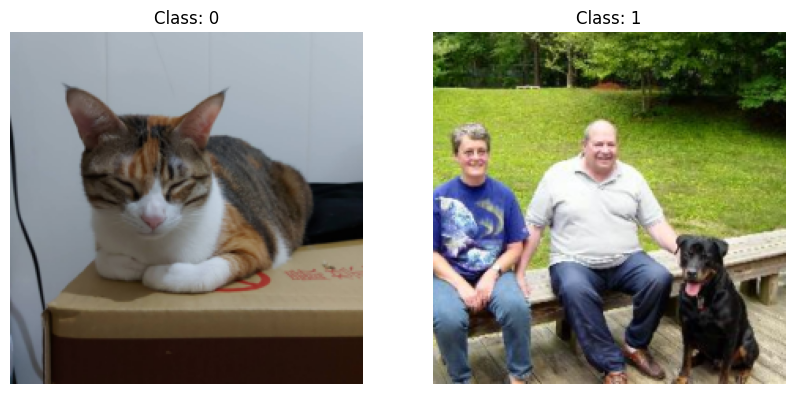

In [19]:
from math import e
import sys
# from PyQt5 import QtCore, QtGui, QtWidgets
# from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton, QLabel, QFileDialog, QGraphicsScene, QGraphicsView
# from PyQt5.QtGui import QPainter, QPixmap, QImage, QPen

import cv2
import numpy as np
from matplotlib import pyplot as plt


import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.models import resnet50
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchsummary import summary
# import matplotlib.pyplot as plt
from tqdm import tqdm

from PIL import Image, ImageQt


# dataset_path = QtWidgets.QFileDialog.getExistingDirectory()
dataset_path = 'E:/YN/opencvdl/Hw2/Dataset_OpenCvDl_Hw2_Q5/dataset'
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])
inference_dataset = torchvision.datasets.ImageFolder(
    root=f"{dataset_path}/inference_dataset", 
    # root=dataset_path, 
    transform=transform
)
inference_loader = DataLoader(inference_dataset, batch_size=32, shuffle=False)

# show one picture from each class
images, labels = next(iter(inference_loader))
images = images.squeeze()
images = torch.swapaxes(images, 1, 2)
images = torch.swapaxes(images, 2, 3)
# print(images.shape)
plt.figure(figsize=(10, 8))
# for i in range(2):
for idx, i in enumerate([0, 6]):
    plt.subplot(1, 2, idx+1)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[i]}')
    plt.axis('off')
plt.show()

In [22]:
inference_loader.dataset.class_to_idx

{'Cat': 0, 'Dog': 1}

In [23]:
image_path = 'resnet50_model_accuracy_comparison.png'
with Image.open(image_path) as img:
    img.show()

In [36]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.models import resnet50
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchsummary import summary
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image, ImageQt
import cv2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = resnet50(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(nn.Linear(num_ftrs, 1, bias=True), nn.Sigmoid())
model.load_state_dict(torch.load('resnet50_model_with_erasing.pth', map_location=device))
model.eval()
model.to(device)

# inference one image
image_path = 'E:/YN/opencvdl/Hw2/Dataset_OpenCvDl_Hw2_Q5/dataset/inference_dataset/Cat/8043.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image)

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])
image = transform(image)
image = image.unsqueeze(0)
image = image.to(device)
print(image.shape)

with torch.no_grad():
    output = model(image)
    print(output)
    print(output.shape)
    print(output.item())



torch.Size([1, 3, 224, 224])
tensor([[0.2442]], device='cuda:0')
torch.Size([1, 1])
0.2442464381456375
